In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
toyota = pd.read_csv("toyota.csv")
toyota.shape

(6738, 9)

In [4]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Показатели набора

model - модель (номинальный)</br>
year - год регистрации (интервальный)</br>
price - цена в фунтах (абсолютный)</br>
transmission - тип коробки передач (номинальный)</br>
mileage - километраж (абсолютный)</br>
fuelType - тип топлива (номинальный)</br>
tax - дорожный налог (абсолютный)</br>
mpg - мили на галлон топлива (абсолютный)</br>
engineSize - объем двигателя (порядковый)</br>

In [7]:
# закодируем строковые поля числовыми метками:
from sklearn.preprocessing import LabelEncoder

string_cols = ("model", "transmission", "fuelType")
toyota_with_labels = toyota.copy()

for col in string_cols:
    lbl = LabelEncoder()
    lbl.fit(list(toyota_with_labels[col].values))
    toyota_with_labels[col] = lbl.transform(list(toyota_with_labels[col].values))

toyota_with_labels

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,8,2011,5500,0,30000,3,20,58.9,1.0
6734,14,2011,4985,1,36154,3,125,50.4,1.3
6735,14,2012,4995,1,46000,0,125,57.6,1.4
6736,14,2011,3995,1,60700,3,125,50.4,1.3


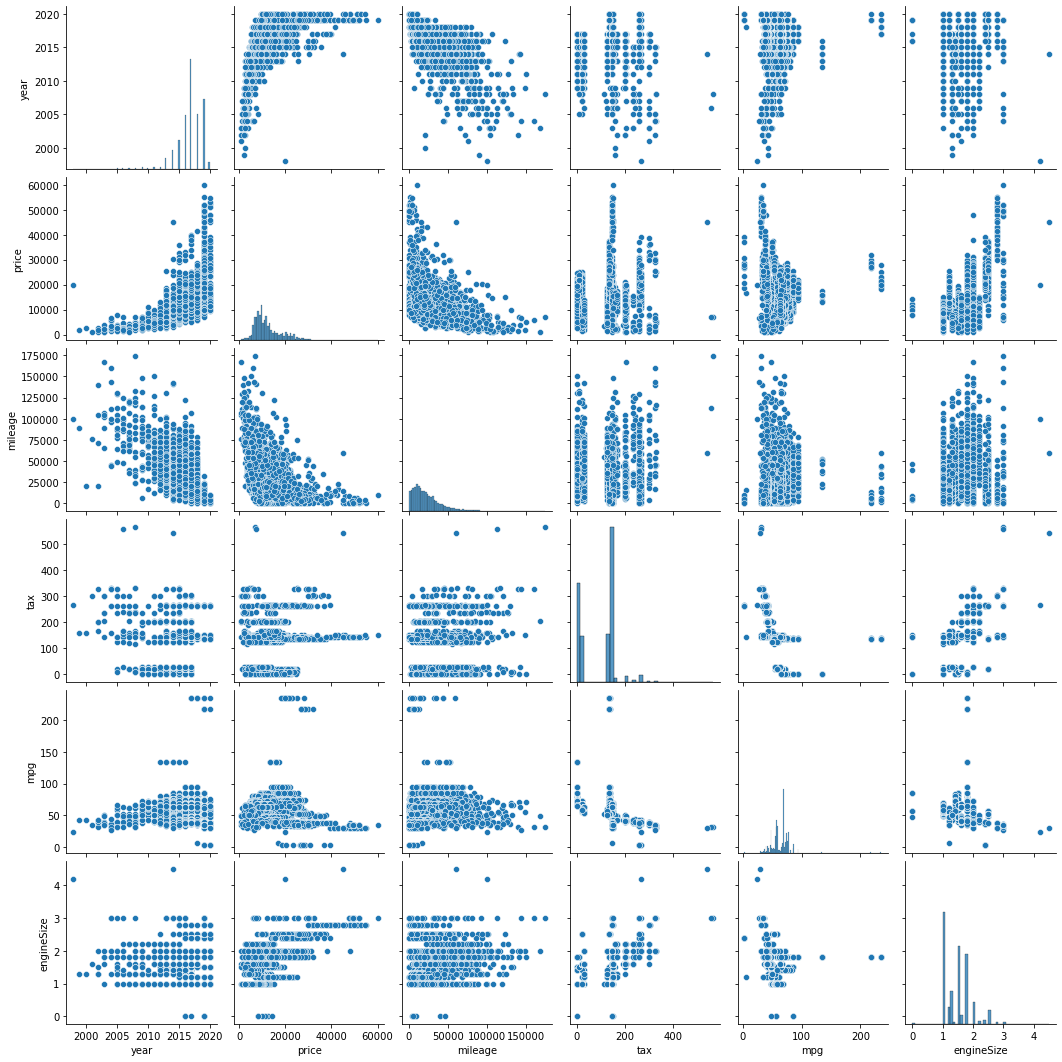

In [5]:
sns.pairplot(toyota)

<AxesSubplot:>

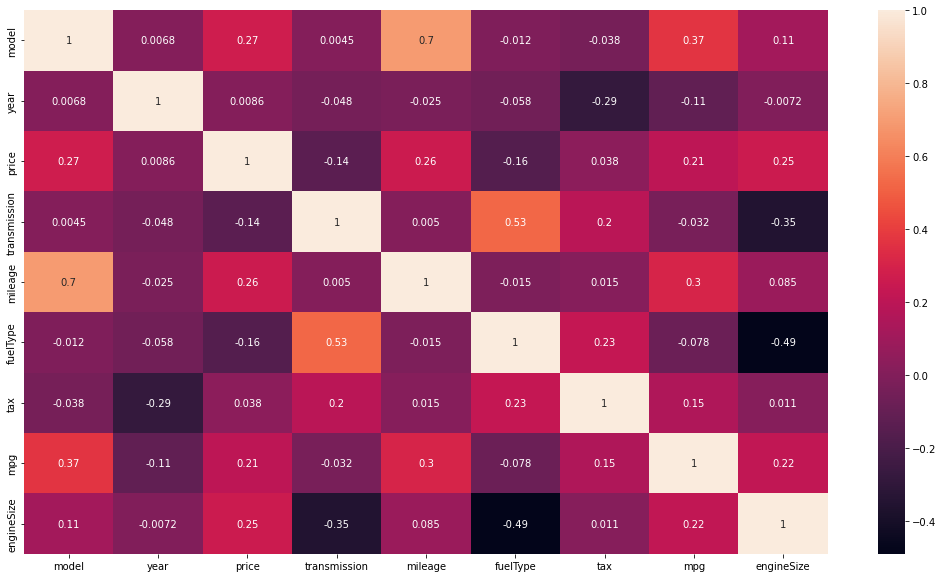

In [8]:
# Коэффициенты корреляции
plt.figure(figsize = (18, 10))
toyota_factorize = toyota_with_labels.apply(lambda x : pd.factorize(x)[0]).corr(method='kendall')
sns.heatmap(toyota_factorize, annot = True)

<AxesSubplot:>

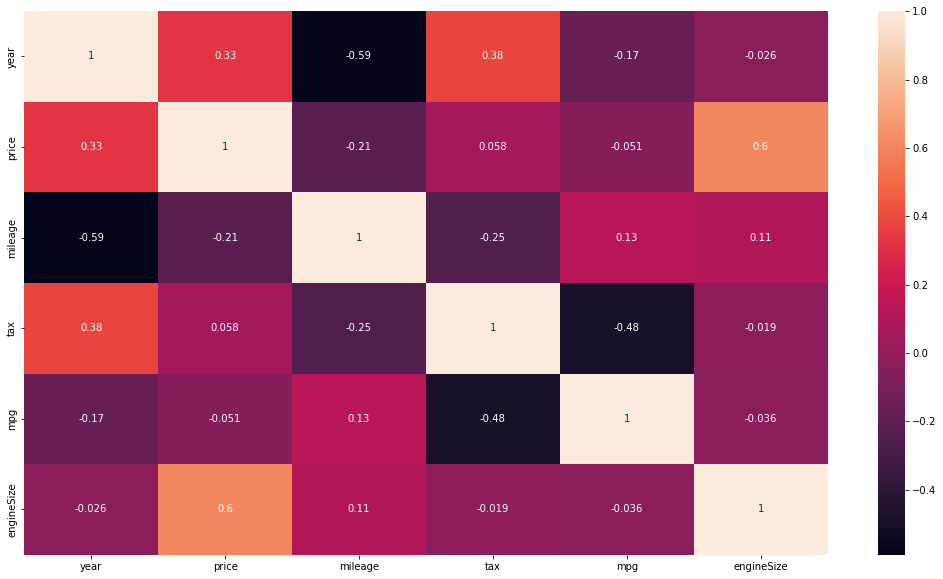

In [9]:
plt.figure(figsize = (18, 10))
sns.heatmap(toyota.corr(method = 'kendall'), annot = True)

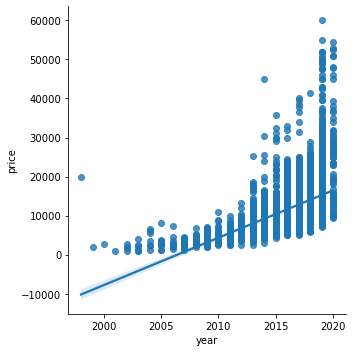

In [10]:
sns.lmplot(x = "year", y = "price", data = toyota)

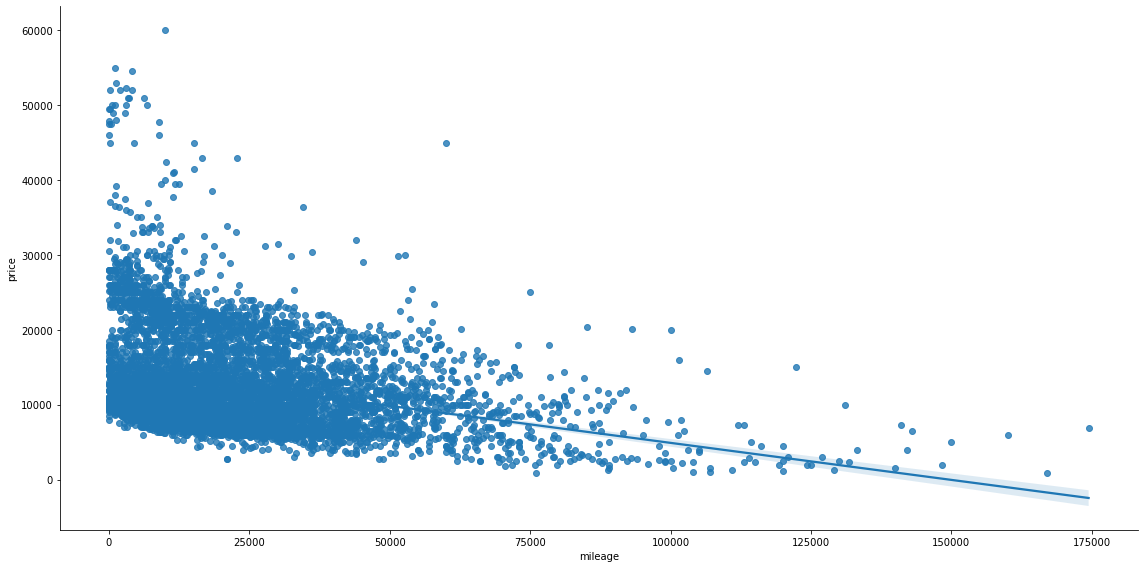

In [11]:
sns.lmplot(x = "mileage", y = "price", data = toyota, height=8, aspect=2)

<AxesSubplot:xlabel='engineSize', ylabel='price'>

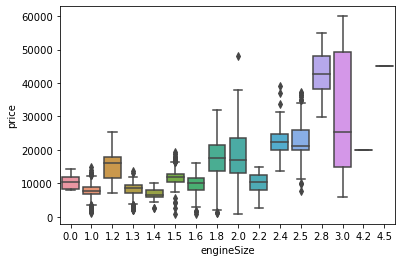

In [12]:
sns.boxplot(x = "engineSize", y = "price", data = toyota_with_labels)

<AxesSubplot:xlabel='model', ylabel='price'>

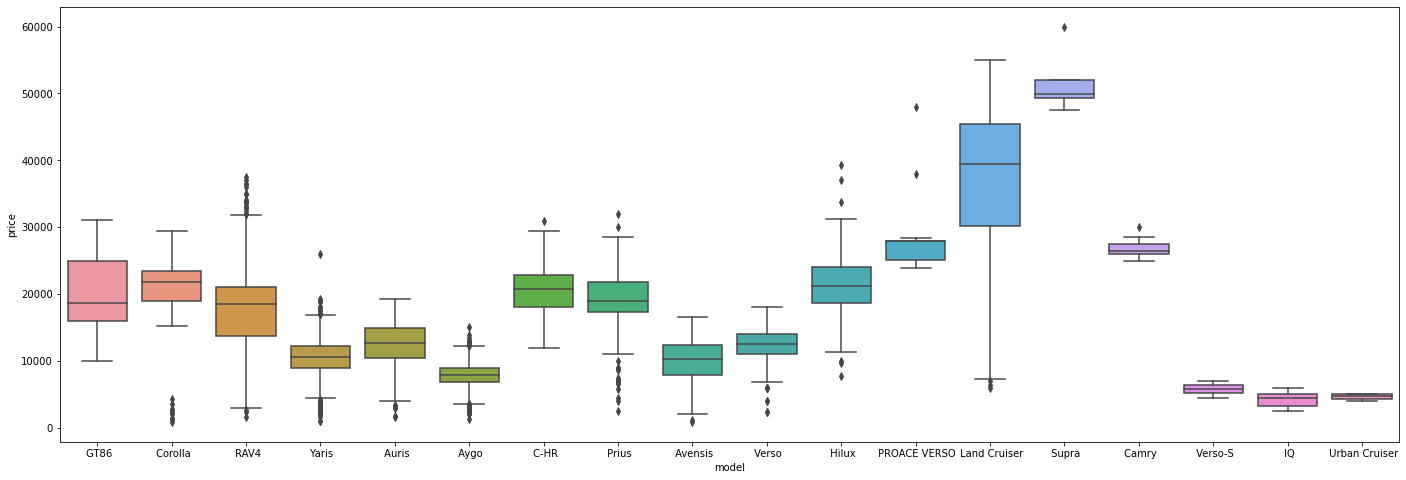

In [13]:
plt.figure(figsize = (24, 8))
sns.boxplot(x = "model", y = "price", data = toyota)

<AxesSubplot:xlabel='transmission', ylabel='price'>

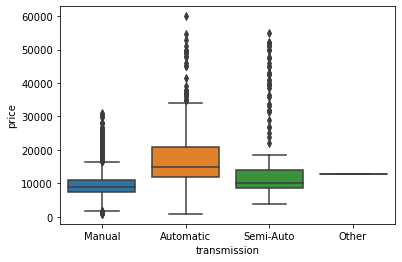

In [14]:
sns.boxplot(x = "transmission", y = "price", data = toyota)

### Подготовка обучающей и тестовой выборки

In [15]:
toyota_with_labels_without_price = toyota_with_labels.drop(['price'], axis=1)
toyota_with_labels_without_price

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,1,24089,3,265,36.2,2.0
1,6,2017,1,18615,3,145,36.2,2.0
2,6,2015,1,27469,3,265,36.2,2.0
3,6,2017,1,14736,3,150,36.2,2.0
4,6,2017,1,36284,3,145,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,8,2011,0,30000,3,20,58.9,1.0
6734,14,2011,1,36154,3,125,50.4,1.3
6735,14,2012,1,46000,0,125,57.6,1.4
6736,14,2011,1,60700,3,125,50.4,1.3


In [16]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

X_all, Y_all = toyota_with_labels_without_price, toyota_with_labels['price']

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, test_size=0.3, random_state=10)

print("Размер обучающей выборки X: ", X_train_all.shape)
print("Размер обучающей выборки Y: ", Y_train_all.shape)
print("Размер тестовой выборки X: ", X_test_all.shape)
print("Размер тестовой выборки Y: ", Y_test_all.shape)

Размер обучающей выборки X:  (4716, 8)
Размер обучающей выборки Y:  (4716,)
Размер тестовой выборки X:  (2022, 8)
Размер тестовой выборки Y:  (2022,)


### Построение регрессионных моделей

In [17]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV

In [44]:
def dummy_LR (X_train_all, X_test_all, Y_train_all, Y_test_all):
    
    Y_mean_all = Y_train_all.mean()
    
    return np.full(Y_test_all.shape, Y_mean_all)

dummy_LR_predictions = dummy_LR (X_train_all, X_test_all, Y_train_all, Y_test_all)

dummy_LR_MSE = metrics.mean_squared_error(Y_test_all, dummy_LR_predictions)

print (f'Dummy MSE = {round(dummy_LR_MSE, 3)}')

Dummy MSE = 39103937.952


#### 1. Прогноз по одному показателю

In [46]:
LR_One_all = LinearRegression()
# обучение модели на данных
X_train_One_all = X_train_all["engineSize"].values.reshape(-1, 1)
X_test_One_all = X_test_all["engineSize"].values.reshape(-1, 1)
LR_One_all.fit(X_train_One_all, Y_train_all)
# вычисление прогноза на тестовых данных
Y_test_LR_One_all = LR_One_all.predict(X_test_One_all)
# вычисление ошибки
metrics.mean_squared_error(Y_test_all, Y_test_LR_One_all, squared = False)

4385.595807873646

In [47]:
# вычисление прогноза на тренировочных данных
Y_train_LR_One_all = LR_One_all.predict(X_train_One_all)
# вычисление ошибки
metrics.mean_squared_error(Y_train_all, Y_train_LR_One_all, squared = False)

4338.747294895195

In [21]:
# y = a*x + b
# выведем коэффициенты модели
print("Смещение = ", LR_One_all.intercept_)
print("Коэффициент = ", LR_One_all.coef_)

Смещение =  -3255.819457419284
Коэффициент =  [10726.18974768]


In [48]:
# расчитаем прогнозируемое значение "вручную"
y_manual_all = LR_One_all.intercept_ + X_test_all["engineSize"][0:5] * LR_One_all.coef_ 
pd.DataFrame({ "Predicted calculated" : y_manual_all, "Predicted" : Y_test_LR_One_all[0:5], "Real" : Y_test_all[0:5] } )

,Predicted calculated,Predicted,Real
6009,16051.322088,16051.322088,22450
3921,7470.370290,7470.370290,5150
2555,7470.370290,7470.370290,7000
577,23559.654912,23559.654912,29550
3892,7470.370290,7470.370290,10000


#### 2. Прогноз по всем показателям

In [23]:
LR_All = LinearRegression()
# обучение модели на данных
LR_All.fit(X_train_all, Y_train_all)
# вычисление прогноза на тестовых данных
Y_test_LR_All = LR_All.predict(X_test_all)
# вычисление ошибки
metrics.mean_squared_error(Y_test_all, Y_test_LR_All, squared = False)

2941.080271053912

In [25]:
pd.Series(LR_All.coef_, index=X_train_all.columns)

model            -117.087194
year              795.131367
transmission     -321.379278
mileage            -0.083804
fuelType         -145.819129
tax                -1.931459
mpg                 3.219043
engineSize      11540.539500
dtype: float64

In [27]:
pd.DataFrame({"Predicted" : Y_test_LR_All[0:10], "Real" : Y_test_all[0:10] } )

,Predicted,Real
6009,19896.169567,22450
3921,4551.847955,5150
2555,5929.131277,7000
577,27203.725576,29550
3892,11094.275548,10000
2996,8631.601442,7995
785,2939.203787,4480
5635,19367.639519,21998
5633,9790.966241,16498
4375,8271.507782,7495


#### 3. Нормировка данных

In [28]:
# нормировка
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

stdScaler = StandardScaler()
X_train_scaled_all = stdScaler.fit_transform(X_train_all)
X_test_scaled_all = stdScaler.transform(X_test_all)
pd.DataFrame(X_train_scaled_all).head()

,0,1,2,3,4,5,6,7
0,-1.171076,-0.344154,-1.018897,-0.101016,0.781743,-1.277297,0.597380,0.751058
1,-0.882506,1.026261,0.489774,-0.903569,0.781743,0.700672,-0.350781,-1.081677
2,1.281768,0.112651,-1.018897,-0.430870,-1.054263,-1.277297,1.474590,0.063782
3,-0.882506,1.026261,0.489774,-1.131346,0.781743,0.700672,-0.350781,-1.081677
4,1.281768,-0.344154,-1.018897,0.954560,-1.054263,-1.277297,1.474590,0.063782


In [29]:
LR_StdScaled_all = LinearRegression()
# обучение модели на данных
LR_StdScaled_all.fit(X_train_scaled_all, Y_train_all)
# вычисление прогноза на тестовых данных
Y_test_LR_StdScaled_all = LR_StdScaled_all.predict(X_test_scaled_all)
# вычисление ошибки
metrics.mean_squared_error(Y_test_all, Y_test_LR_StdScaled_all, squared = False)

2941.0802710539256

In [31]:
pd.Series(LR_StdScaled_all.coef_, index=X_train_all.columns)

model           -811.499624
year            1740.636507
transmission    -213.021494
mileage        -1603.402015
fuelType        -158.843801
tax             -141.590473
mpg               49.907062
engineSize      5037.513703
dtype: float64

In [32]:
pd.DataFrame({"Predicted" : Y_test_LR_StdScaled_all[0:10], "Real" : Y_test_all[0:10] } )

,Predicted,Real
6009,19896.169567,22450
3921,4551.847955,5150
2555,5929.131277,7000
577,27203.725576,29550
3892,11094.275548,10000
2996,8631.601442,7995
785,2939.203787,4480
5635,19367.639519,21998
5633,9790.966241,16498
4375,8271.507782,7495


#### 4. Регуляризация

In [33]:
# Используем модель линейной регрессии с регуляризацией типа "Lasso"
LR_lasso_all = Lasso()
LR_lasso_all.fit(X_train_scaled_all, Y_train_all)
Y_test_lasso_all = LR_lasso_all.predict(X_test_scaled_all)
metrics.mean_squared_error(Y_test_lasso_all, Y_test_all, squared=False)

2941.1286423780816

In [35]:
pd.Series(LR_lasso_all.coef_, index=X_train_all.columns)

model           -810.152044
year            1739.955310
transmission    -212.853184
mileage        -1602.335564
fuelType        -159.631249
tax             -140.120883
mpg               49.220140
engineSize      5035.219815
dtype: float64

In [36]:
pd.DataFrame({"Predicted" : Y_test_lasso_all[0:10], "Real" : Y_test_all[0:10] } )

,Predicted,Real
6009,19893.273396,22450
3921,4552.230914,5150
2555,5930.473060,7000
577,27199.660230,29550
3892,11094.374751,10000
2996,8633.614400,7995
785,2950.458687,4480
5635,19364.783390,21998
5633,9792.638406,16498
4375,8269.856308,7495


#### 6. Другие рергессионные модели

In [37]:
# регрессор на базе случайного леса 
from sklearn.ensemble import RandomForestRegressor

RF_model_all = RandomForestRegressor(random_state = 10, n_estimators = 100)

RF_model_all.fit(X_train_all, Y_train_all)
Y_test_RF_all = RF_model_all.predict(X_test_all)

metrics.mean_squared_error(Y_test_RF_all, Y_test_all, squared=False)

1352.1751268766961

In [38]:
# оценки важности показателей с точки зрения модели RandomForest
RF_model_all.feature_importances_

array([0.0328515 , 0.26691695, 0.01522714, 0.04971657, 0.00206086,
       0.01097508, 0.04526758, 0.57698433])

In [39]:
pd.DataFrame({"Predicted" : Y_test_RF_all[0:10], "Real" : Y_test_all[0:10] } )

,Predicted,Real
6009,22791.68,22450
3921,5331.10,5150
2555,8185.79,7000
577,31248.93,29550
3892,10024.00,10000
2996,9276.54,7995
785,3387.73,4480
5635,21369.80,21998
5633,15503.14,16498
4375,7465.61,7495


In [72]:
# Полиномиальная регрессия
# y = b + a1 * x1 + a2 * x2 + a12 * x1 * x2 +  a1s * x1^2 + .. .. ..

from sklearn.preprocessing import PolynomialFeatures

poly_all = PolynomialFeatures(2, include_bias=False)
poly_df_all = poly_all.fit_transform(toyota_with_labels) 
scaled_poly_df_all = stdScaler.fit_transform(poly_df_all) 
print(f"shape: {scaled_poly_df_all.shape}")

PolyModel_all = LinearRegression()
PolyModel_all.fit(scaled_poly_df_all, toyota_with_labels.price)
predictions_all = PolyModel_all.predict(scaled_poly_df_all) 
mse = metrics.mean_squared_error(toyota_with_labels.price, predictions_all, squared=False) 
print("RMSE: {}".format(mse))

shape: (6738, 54)
RMSE: 1.540765800703764e-11


In [73]:
pd.DataFrame({"Predicted" : predictions_all[0:10], "Real" : Y_test_all[0:10] } )

,Predicted,Real
6009,16000.0,22450
3921,15995.0,5150
2555,13998.0,7000
577,18998.0,29550
3892,17498.0,10000
2996,15998.0,7995
785,18522.0,4480
5635,18995.0,21998
5633,27998.0,16498
4375,13990.0,7495


### Без качественных показателей

In [70]:
toyota_without_naminal = toyota.drop(columns=['model', 'transmission', 'fuelType', 'engineSize'])
toyota_without_naminal.head()

,year,price,mileage,tax,mpg
0,2016,16000,24089,265,36.2
1,2017,15995,18615,145,36.2
2,2015,13998,27469,265,36.2
3,2017,18998,14736,150,36.2
4,2017,17498,36284,145,36.2


In [71]:
X, Y = toyota_without_naminal.drop(['price'], axis=1), toyota_without_naminal['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print("Размер обучающей выборки X: ", X_train.shape)
print("Размер обучающей выборки Y: ", Y_train.shape)
print("Размер тестовой выборки X: ", X_test.shape)
print("Размер тестовой выборки Y: ", Y_test.shape)

Размер обучающей выборки X:  (4716, 4)
Размер обучающей выборки Y:  (4716,)
Размер тестовой выборки X:  (2022, 4)
Размер тестовой выборки Y:  (2022,)


#### 1. Прогноз по одному показателю

In [56]:
LR_One = LinearRegression()
# обучение модели на данных
X_train_One = X_train["year"].values.reshape(-1, 1)
X_test_One = X_test["year"].values.reshape(-1, 1)
LR_One.fit(X_train_One, Y_train)
# вычисление прогноза на тестовых данных
Y_test_LR_One = LR_One.predict(X_test_One)
# вычисление ошибки
print("Ошибка = ", metrics.mean_squared_error(Y_test, Y_test_LR_One, squared = False))
print("Смещение = ", LR_One.intercept_)
print("Коэффициент = ", LR_One.coef_)

Ошибка =  5651.343336881248
Смещение =  -2445493.337948309
Коэффициент =  [1218.80453007]


In [57]:
# расчитаем прогнозируемое значение "вручную"
y_manual = LR_One.intercept_ + X_test["year"][0:5] * LR_One.coef_ 
pd.DataFrame({ "Predicted calculated" : y_manual, "Predicted" : Y_test_LR_One[0:5], "Real" : Y_test[0:5] } )

,Predicted calculated,Predicted,Real
6009,15273.008269,15273.008269,22450
3921,10397.790149,10397.790149,5150
2555,10397.790149,10397.790149,7000
577,15273.008269,15273.008269,29550
3892,15273.008269,15273.008269,10000


#### 2. Прогноз по всем показателям

In [59]:
LR = LinearRegression()
# обучение модели на данных
LR.fit(X_train, Y_train)
# вычисление прогноза на тестовых данных
Y_test_LR = LR.predict(X_test)
# вычисление ошибки
print("Ошибка = ",metrics.mean_squared_error(Y_test, Y_test_LR, squared = False))
pd.Series(LR.coef_, index=X_train.columns)

Ошибка =  5601.47417029562


year       1154.809246
mileage       0.002891
tax           8.081899
mpg          -0.678334
dtype: float64

In [60]:
pd.DataFrame({"Predicted" : Y_test_LR[0:10], "Real" : Y_test[0:10] } )

,Predicted,Real
6009,15466.658877,22450
3921,9812.298438,5150
2555,9705.909542,7000
577,15430.834105,29550
3892,15484.194568,10000
2996,11277.093668,7995
785,4627.418982,4480
5635,14262.577051,21998
5633,13286.345096,16498
4375,12048.521770,7495


#### 3. Нормировка данных

In [61]:
stdScaler = StandardScaler()
X_train_scaled = stdScaler.fit_transform(X_train)
X_test_scaled = stdScaler.transform(X_test)
pd.DataFrame(X_train_scaled).head()

,0,1,2,3
0,-0.344154,-0.101016,-1.277297,0.597380
1,1.026261,-0.903569,0.700672,-0.350781
2,0.112651,-0.430870,-1.277297,1.474590
3,1.026261,-1.131346,0.700672,-0.350781
4,-0.344154,0.954560,-1.277297,1.474590


In [63]:
LR_StdScaled = LinearRegression()
# обучение модели на данных
LR_StdScaled.fit(X_train_scaled, Y_train)
# вычисление прогноза на тестовых данных
Y_test_LR_StdScaled = LR_StdScaled.predict(X_test_scaled)
# вычисление ошибки
print("Ошибка = ",metrics.mean_squared_error(Y_test, Y_test_LR_StdScaled, squared = False))
pd.Series(LR_StdScaled.coef_, index=X_train.columns)

Ошибка =  5601.474170295616


year       2528.013882
mileage      55.308101
tax         592.463948
mpg         -10.516681
dtype: float64

In [64]:
pd.DataFrame({"Predicted" : Y_test_LR_StdScaled[0:10], "Real" : Y_test[0:10] } )

,Predicted,Real
6009,15466.658877,22450
3921,9812.298438,5150
2555,9705.909542,7000
577,15430.834105,29550
3892,15484.194568,10000
2996,11277.093668,7995
785,4627.418982,4480
5635,14262.577051,21998
5633,13286.345096,16498
4375,12048.521770,7495


#### 4. Регуляризация

In [65]:
LR_lasso = Lasso()
LR_lasso.fit(X_train_scaled, Y_train)
Y_test_lasso = LR_lasso.predict(X_test_scaled)
print("Ошибка = ",metrics.mean_squared_error(Y_test_lasso, Y_test, squared=False))
pd.Series(LR_lasso.coef_, index=X_train.columns)

Ошибка =  5601.504589363866


year       2524.428901
mileage      51.583829
tax         592.163566
mpg          -9.562127
dtype: float64

In [66]:
pd.DataFrame({"Predicted" : Y_test_lasso[0:10], "Real" : Y_test[0:10] } )

,Predicted,Real
6009,15465.478171,22450
3921,9811.670312,5150
2555,9712.397628,7000
577,15428.972619,29550
3892,15484.269806,10000
2996,11264.729653,7995
785,4620.698681,4480
5635,14263.651281,21998
5633,13284.701536,16498
4375,12049.558978,7495


#### 6. Другие рергессионные модели

In [67]:
# регрессор на базе случайного леса 
RF_model = RandomForestRegressor(random_state = 10, n_estimators = 100)

RF_model.fit(X_train, Y_train)
Y_test_RF = RF_model.predict(X_test)

metrics.mean_squared_error(Y_test_RF, Y_test, squared=False)

1676.2779613685466

In [68]:
# оценки важности показателей с точки зрения модели RandomForest
RF_model_all.feature_importances_

array([0.0328515 , 0.26691695, 0.01522714, 0.04971657, 0.00206086,
       0.01097508, 0.04526758, 0.57698433])

In [69]:
pd.DataFrame({"Predicted" : Y_test_RF[0:10], "Real" : Y_test[0:10] } )

,Predicted,Real
6009,22583.57,22450
3921,5331.10,5150
2555,8317.14,7000
577,31354.49,29550
3892,10024.00,10000
2996,9101.93,7995
785,5634.75,4480
5635,21424.48,21998
5633,15377.20,16498
4375,7491.71,7495


In [75]:
# Полиномиальная регрессия
# y = b + a1 * x1 + a2 * x2 + a12 * x1 * x2 +  a1s * x1^2 + .. .. ..

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(toyota_without_naminal) 
scaled_poly_df = stdScaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")

PolyModel = LinearRegression()
PolyModel.fit(scaled_poly_df, toyota_without_naminal.price)
predictions = PolyModel.predict(scaled_poly_df) 
mse = metrics.mean_squared_error(toyota_without_naminal.price, predictions, squared=False) 
print("RMSE: {}".format(mse))

shape: (6738, 20)
RMSE: 1.1857625045255181e-11


In [76]:
pd.DataFrame({"Predicted" : predictions[0:10], "Real" : Y_test[0:10] } )

,Predicted,Real
6009,16000.0,22450
3921,15995.0,5150
2555,13998.0,7000
577,18998.0,29550
3892,17498.0,10000
2996,15998.0,7995
785,18522.0,4480
5635,18995.0,21998
5633,27998.0,16498
4375,13990.0,7495
